<a href="https://colab.research.google.com/github/sunghwan-yoon/CubeLab/blob/master/Linear_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1차 머신러닝 스터디 
### Linear Regression 선형 회귀

선형 회귀(Linear Regression)는 널리 사용되는 대표적인 회귀 알고리즘이다. 선형 회귀는 종속 변수 y와 하나 이상의 독립 변수 x와의 선형 상관관계를 모델링하는 기법이다. 만약 독립 변수 x가 1개라면 단순 선형 회귀라고 하고, 2개 이상이면 다중 선형 회귀라고 한다. 
 
1) 단순 선형 회귀 (Simple Linear Regression)
 
image.png

단순 선형 회귀는 위의 식으로 나타난다. 머신러닝에서는 독립 변수 x에 곱해지는 W값을 가중치(weight), 상수항에 해당하는 b를 편향(bias)이라고 부른다. 
따라서 단순 선형 회귀 모델을 훈련하는 것은 적절한 W와 b값을 찾는 것이다. 그래프의 형태는 직선으로 나타난다. 

**그 직선을 바탕으로 예측하는 것이 선형회귀**

출처: https://rebro.kr/185 [Rebro의 코딩 일기장:티스토리]



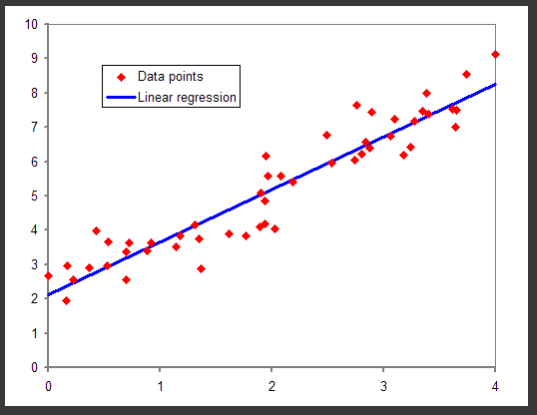

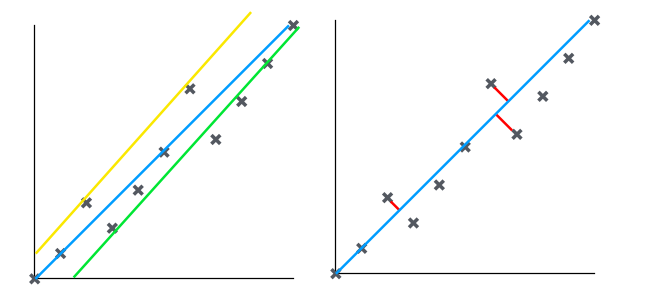



선형 회귀는 지도학습의 종류

선형 회귀 (Linear Regression) :
종속변수 Y (x에 의해 변화) 와 한 개 이상의 독립변수 X(독립적변화) 와의 선형 상관관계를 모델링 하는 모델링 기법

예시 : x 공부량, y 점수 , x키 y 몸무게


Cost Function 
H(x) - y값


## Cost Function 정의
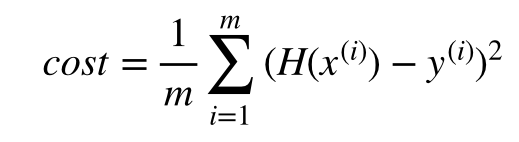

H(x) 그래프 상의 y값과 실제 y값의 차를 모두 더한다음 갯수로 나눈 평균값을 비용함수로 정의함


**목표는 Cost가 가장 적은 W를 찾는것( cost 오류(실제값과 편차)가 가장 적은 W 찾기** ->

W와 Cost의 상관 관계를 그리기

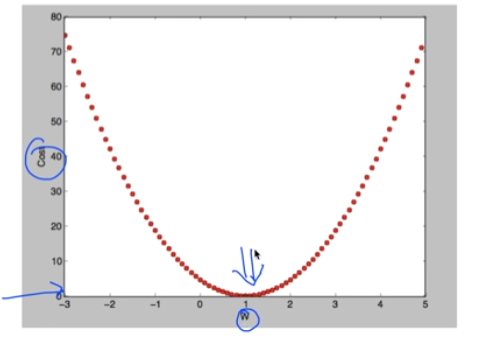

## Gradient descent algorithm
경사 하강법 이용

W가 너무 작아도 Cost 증가, W가 너무 커도 Cost 증가 (2차함수)

Cost가 가장 적은(오차가 가장적은) W값은 
cost(W) 함수를 미분했을 때 기울기가 0이 되는 W값을 찾으면 됨.

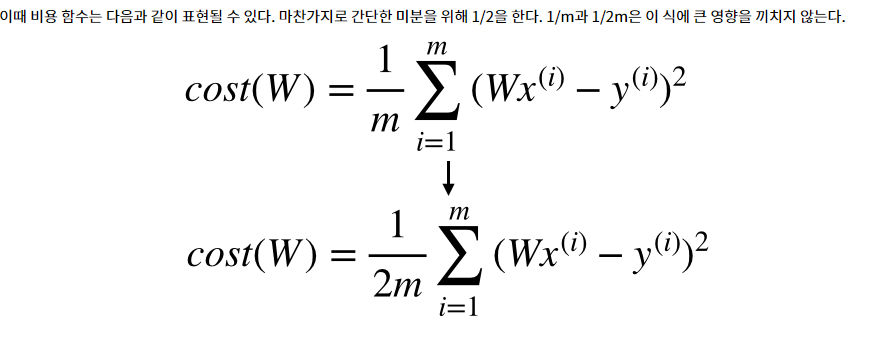

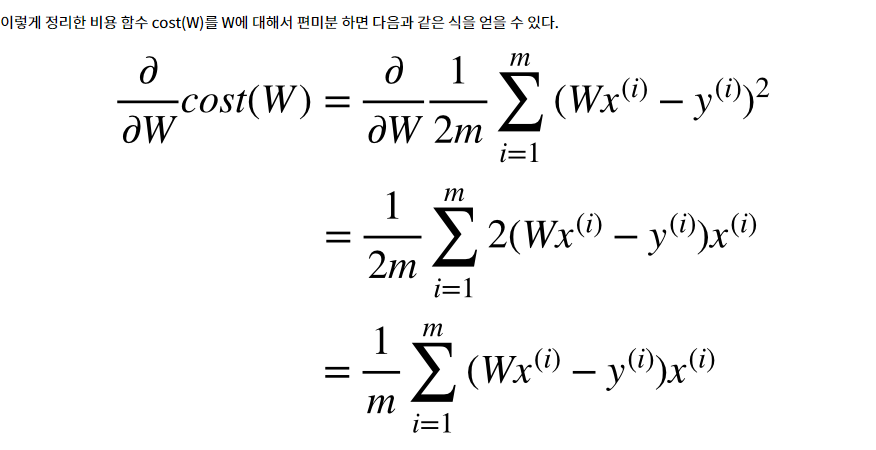

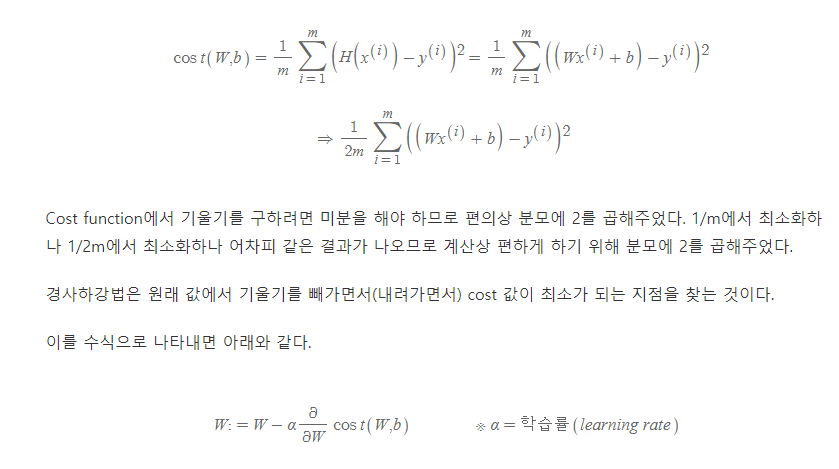


실제로 y=x(2) 그래프로 계산
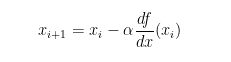

xi+1에 xi - 학습률(알파)*기울기값

y=(x-3)2 함수에 학습률 0.7로 두고 하면 몇번만에 기울기가 0으로 수렴하는 x 찾을 수 있음.

y'= 2x-6
if(x=1 a=0.7) , xi+1 = 3.8
if(x=3.8 a=0.7), xi+1 = 2.68

계속 진행 하면서 x값(W)을 찾는 과정

실제 구현코드는 아래

https://angeloyeo.github.io/2020/08/16/gradient_descent.html


https://codingslime.tistory.com/18?category=799568

https://sujinlee.me/linear-regression/

     i|          w|          b|          cost
    0 |     1.9100 |     0.4700 |     0.2500
   10 |     1.8850 |     0.4151 |     0.0320
   20 |     1.8962 |     0.3749 |     0.0261
   30 |     1.9062 |     0.3385 |     0.0213
   40 |     1.9153 |     0.3057 |     0.0174
   50 |     1.9235 |     0.2761 |     0.0142
   60 |     1.9309 |     0.2493 |     0.0115
   70 |     1.9376 |     0.2252 |     0.0094
   80 |     1.9437 |     0.2033 |     0.0077
   90 |     1.9491 |     0.1836 |     0.0063
  100 |     1.9541 |     0.1658 |     0.0051


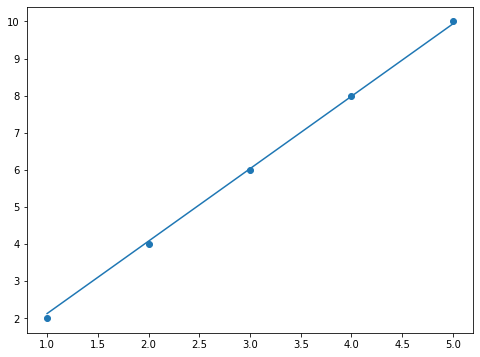

In [1]:
# Lab 2 Linear Regression
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# X and Y data

x_data = [1, 2, 3,4,5]
y_data = [2, 4, 6,8,10]

w = tf.Variable(2.0)
b = tf.Variable(0.5)

learning_rate = 0.03




print('     i|          w|          b|          cost')
for i in range(101):
  with tf.GradientTape() as tape:
    hypothesis = w * x_data +b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))  #cost 함수 구하는 공식 (W(x)-y)제곱 을 모두 더한다음 m으로 나눔(reduce_mean 함수)

  w_grad, b_grad = tape.gradient(cost, [w,b]) #cost 함수를 미분 (tape.gradient)
  w.assign_sub(learning_rate * w_grad)  #w.assign_sub 함수는 w[i+1] = w[i]*a
  b.assign_sub(learning_rate * b_grad)

  
  if i % 10 == 0:
    print("{:5} | {:10.4f} | {:10.4f} | {:10.4f}" .format(i,w.numpy(),b.numpy(),cost))


list_y = (x_data*w)+b

plt.figure(figsize=(8,6))
plt.scatter(x_data,y_data)
plt.plot(x_data,list_y)
plt.show()

코드 해석
https://sindh718.tistory.com/98